In [16]:
# 1. Low-Pass Filtering


# memanggil modul yang diperlukan
import cv2
import numpy as np
from matplotlib import pyplot as plt

# membaca citra awal
img = cv2.imread('Image/enola.jpg')

# Ubah ke format RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

# membuat filter: matriks berukuran 5 x 5 
kernel = np.ones((5,5),np.float32)/25

# lakukan filtering
puppy_filter = cv2.filter2D(img,-1,kernel)

([], [])

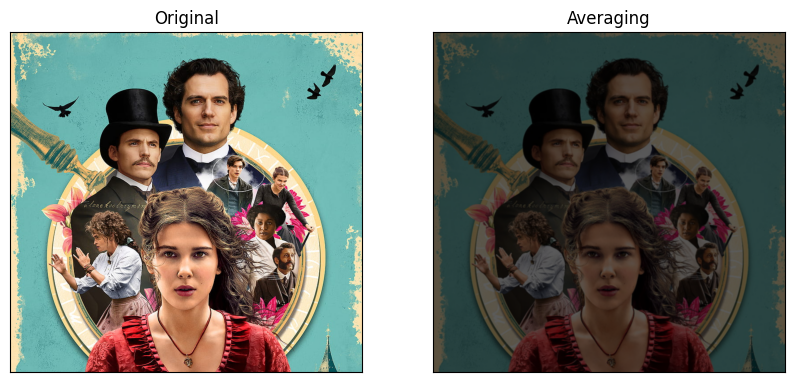

In [17]:
# Membuat kernel
kernel = np.ones((3, 3), np.float32) / 25

# Melakukan filtering pada citra 'img' menggunakan kernel 'kernel'. 
enola_filter = cv2.filter2D(img, -1, kernel)

# Mengatur ukuran tampilan plot
plt.rcParams["figure.figsize"] = (10, 10)

# Membuat subplot
plt.subplot(121)

# Menampilkan citra asli.
plt.imshow(img)

# Memberikan title pada subplot.
plt.title('Original')


# Menghilangkan label sumbu x dan y.
plt.xticks([])
plt.yticks([])

# Membuat subplot
plt.subplot(122)

# Menampilkan hasil filtering.
plt.imshow(enola_filter)

# Memberikan judul pada subplot.
plt.title('Averaging')

# Menghilangkan label sumbu x dan y.
plt.xticks([])
plt.yticks([])


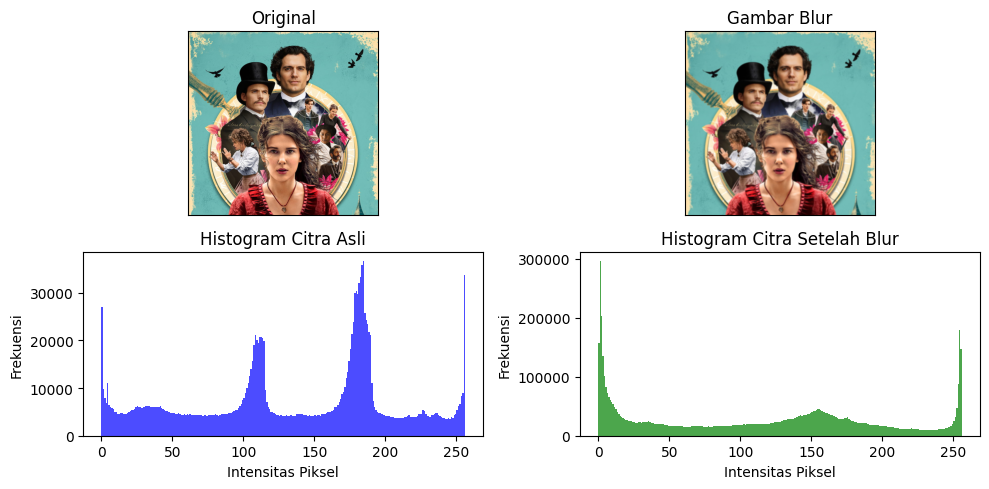

In [18]:
# Melakukan proses blurring pada citra
enola_blur = cv2.blur(img, (5, 5))

# Mengatur ukuran tampilan plot
plt.rcParams["figure.figsize"] = (10, 5)

# Membuat subplot 
plt.subplot(221)

# Menampilkan citra asli
plt.imshow(img, cmap='gray')

# Memberikan title pada subplot.
plt.title('Original')

# Menghilangkan label sumbu x dan y.
plt.xticks([])
plt.yticks([])

# Membuat subplot 
plt.subplot(222)

# Menampilkan citra hasil blurring
plt.imshow(enola_blur, cmap='gray')

# Memberikan title pada subplot.
plt.title('Gambar Blur')

# Menghilangkan label sumbu x dan y.
plt.xticks([])
plt.yticks([])

# Membuat subplot 
plt.subplot(223)

# Menampilkan histogram dari citra asli.
plt.hist(img.ravel(), 256, [0, 256], color='blue', alpha=0.7)

# Memberikan title pada subplot.
plt.title('Histogram Citra Asli')

# Memberikan label sumbu x dan y.
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

# Membuat subplot
plt.subplot(224)

# Menampilkan histogram dari citra hasil blurring.
plt.hist(puppy_blur.ravel(), 256, [0, 256], color='green', alpha=0.7)

# Memberikan title pada subplot.
plt.title('Histogram Citra Setelah Blur')

# Memberikan label sumbu x dan y.
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

# Menyusun tata letak subplot secara otomatis.
plt.tight_layout()

# Menampilkan plot.
plt.show()

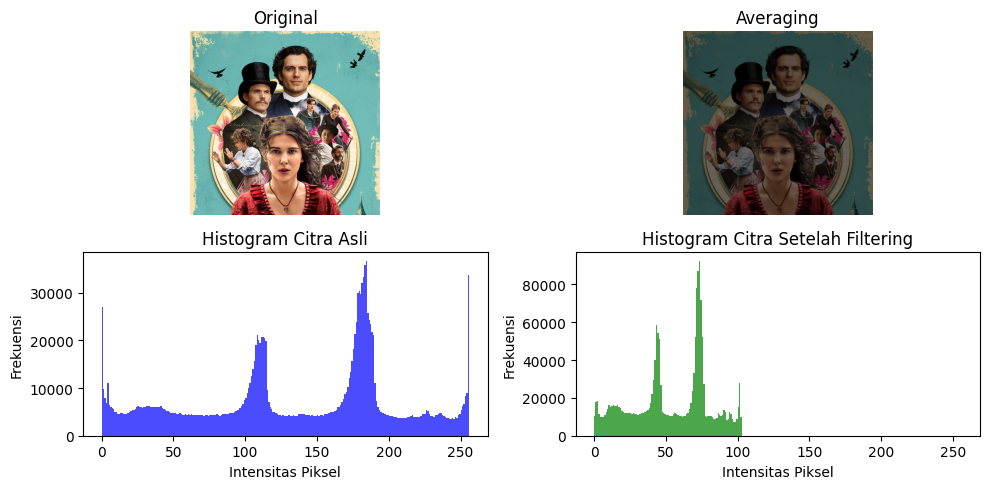

In [19]:
# ini adalah cara lain untuk membuat sebuah kernel, 
# yaitu dengan menggunakan np.matrix
# kali ini, ukuran matriksnya 3 x 3

# Membuat kernel
kernel = np.matrix([
          [1, 1, 1],
          [1, 2, 1],
          [1, 1, 1]         
          ])/25
 

# Melakukan proses filtering
enola_filter = cv2.filter2D(img, -1, kernel)

# Membuat plot
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

# Plot gambar asli
# Menampilkan citra asli pada subplot pertama.
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Original')
axs[0, 0].axis('off')

# Plot hasil filtering
# Menampilkan citra hasil filtering 
axs[0, 1].imshow(enola_filter, cmap='gray')
axs[0, 1].set_title('Averaging')
axs[0, 1].axis('off')

# Plot histogram citra asli
# Menampilkan histogram dari citra asli
axs[1, 0].hist(img.ravel(), 256, [0, 256], color='blue', alpha=0.7)
axs[1, 0].set_title('Histogram Citra Asli')
axs[1, 0].set_xlabel('Intensitas Piksel')
axs[1, 0].set_ylabel('Frekuensi')
 
# Plot histogram citra setelah filtering
# Menampilkan histogram dari citra hasil filtering pada subplot
axs[1, 1].hist(enola_filter.ravel(), 256, [0, 256], color='green', alpha=0.7)
axs[1, 1].set_title('Histogram Citra Setelah Filtering')
axs[1, 1].set_xlabel('Intensitas Piksel')
axs[1, 1].set_ylabel('Frekuensi')

# Menyusun tata letak subplot secara otomatis agar lebih rapi.
plt.tight_layout()


Text(0.5, 1.0, 'Histogram - Laplacian')

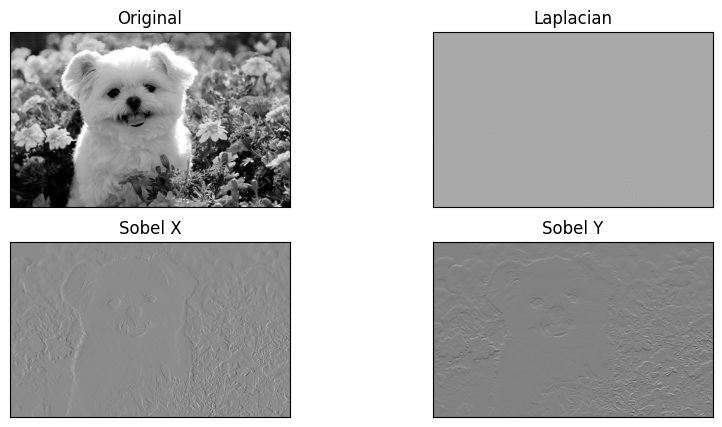

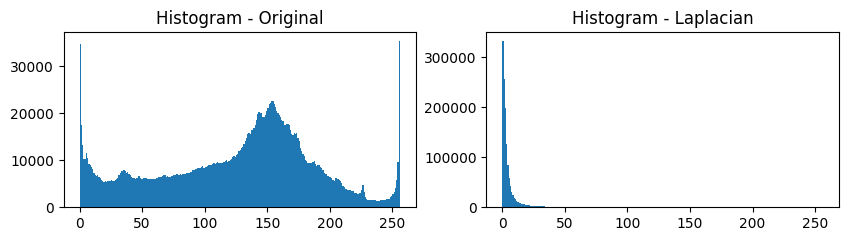

In [22]:
# 2. High-Pass Filtering

import cv2
import numpy as np
from matplotlib import pyplot as plt

# membaca citra awal
img = cv2.imread('Image/puppy.jpg', 0)

# Menerapkan algoritma high-pass filtering:
# Laplacian
laplacian = cv2.Laplacian(img, cv2.CV_64F)

# Sobel dengan ukuran kernel 5
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

# Perbesar ukuran hasil plotting
plt.rcParams["figure.figsize"] = (10, 5)

# Menampilkan hasil filter
plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

# Membuat histogram dalam satu plot
plt.figure()
plt.subplot(2, 2, 1)
plt.hist(img.ravel(), 256, [0, 256])
plt.title('Histogram - Original')
plt.subplot(2, 2, 2)
plt.hist(laplacian.ravel(), 256, [0, 256])
plt.title('Histogram - Laplacian')



Text(0, 0.5, 'Frequency')

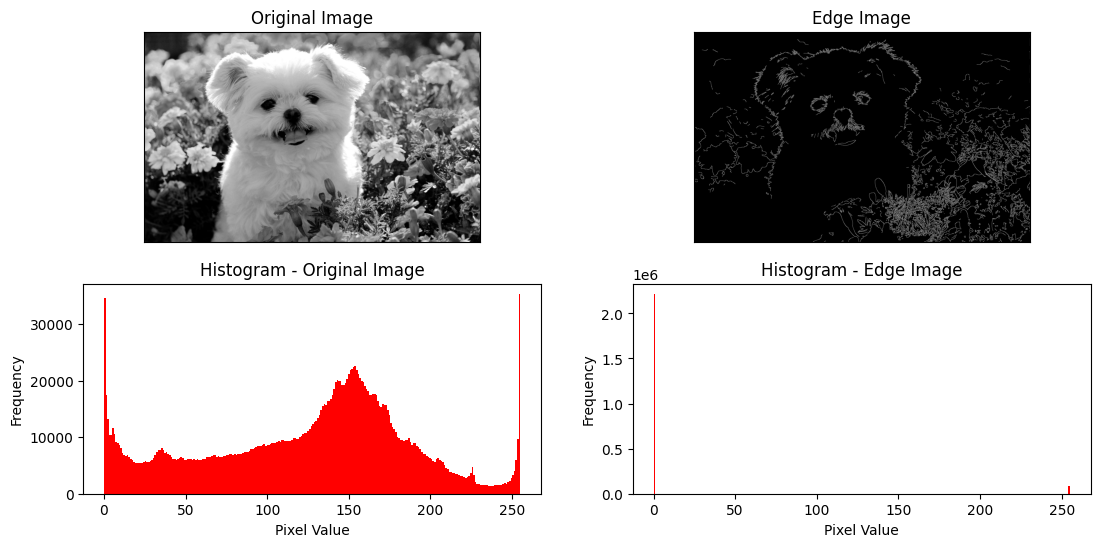

In [23]:
# Membaca citra
img = cv2.imread('Image/PUPPY.jpg', 0)

# Menerapkan deteksi tepi menggunakan metode Canny pada citra
edges = cv2.Canny(img, 100, 200)
 
# Perbesar ukuran hasil plotting
plt.rcParams["figure.figsize"] = (13, 6)

# Menampilkan citra asli dan citra tepi dalam satu plot
# Membuat subplot dengan 2 baris dan 2 kolom. Pada subplot pertama, menampilkan citra asli dengan judul 'Original Image'. Pada subplot kedua, menampilkan citra tepi dengan judul 'Edge Image'.
plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

# Menampilkan histogram citra asli
# Membuat subplot untuk menampilkan histogram dari citra asli. Memberikan judul 'Histogram - Original Image'. Memberikan label sumbu x dan y pada subplot.
plt.subplot(2, 2, 3)
plt.hist(img.ravel(), bins=256, color='red')
plt.title('Histogram - Original Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Menampilkan histogram citra sesudah filtering
# Membuat subplot untuk menampilkan histogram dari citra tepi. Memberikan judul 'Histogram - Edge Image'. Memberikan label sumbu x dan y pada subplot.
plt.subplot(2, 2, 4)
plt.hist(edges.ravel(), bins=256, color='red')
plt.title('Histogram - Edge Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')


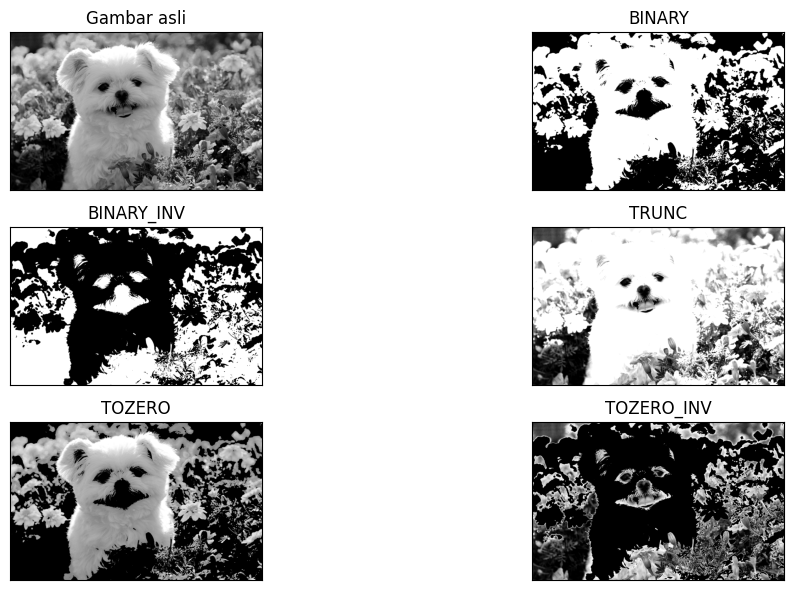

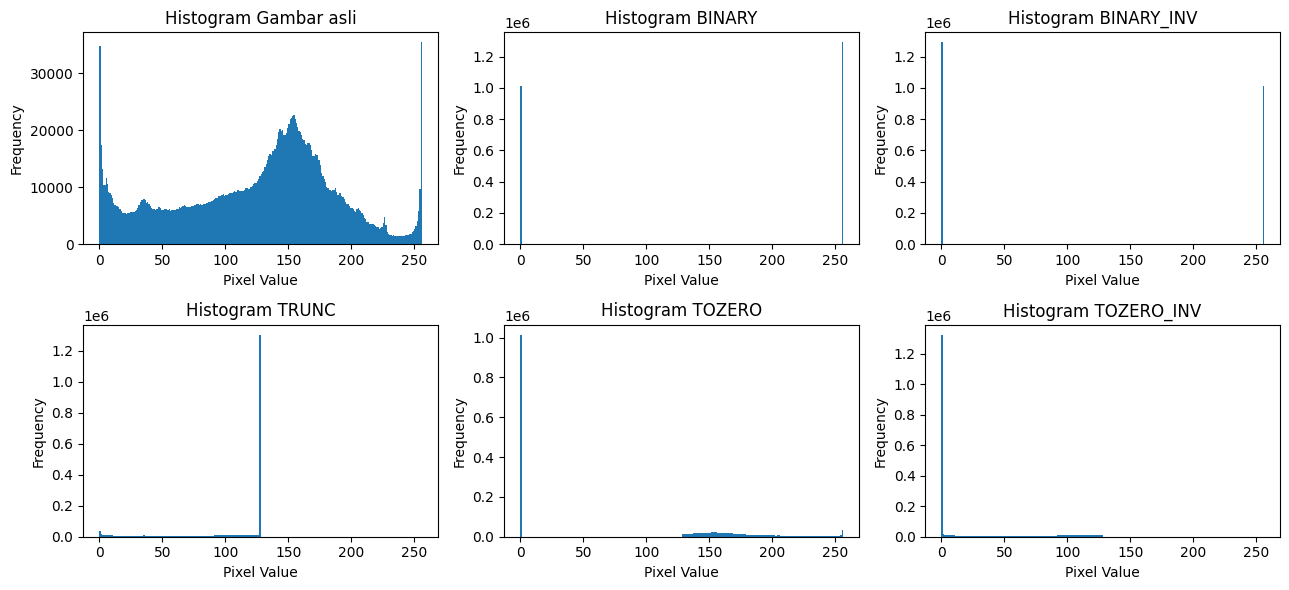

In [24]:
# 3. Image Thresholding

import cv2
import numpy as np
from matplotlib import pyplot as plt

# membaca gambar
img = cv2.imread('Image/PUPPY.jpg', 0)

# Hitungan threshold.
# Perhatikan nilai ambang batas bawah dan atas dari tiap fungsi yang diberikan
# Menggunakan fungsi thresholding dari OpenCV untuk menghasilkan citra biner dengan menggunakan nilai threshold 127.
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

# menampilkan hasil
titles = ['Gambar asli', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

# menampilkan beberapa gambar sekaligus
for i in range(6):
    # 3 baris, 2 kolom
    plt.subplot(3, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
# Melakukan iterasi untuk menampilkan gambar-gambar secara berurutan. 

# Mengatur tata letak subplot 
plt.tight_layout()
plt.show()

# Membuat subplot untuk menampilkan histogram dari citra asli.
plt.subplot(2, 3, 1)
plt.hist(img.ravel(), 256, [0, 256])
plt.title('Histogram Gambar asli')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Membuat histogram dari gambar setelah di filter
for i in range(1, 6):
    plt.subplot(2, 3, i + 1)
    plt.hist(images[i].ravel(), 256, [0, 256])
    plt.title('Histogram ' + titles[i])
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
# Melakukan iterasi untuk menampilkan histogram dari gambar hasil thresholding. Mengatur tata letak subplot dengan 2 baris dan 3 kolom. Menampilkan histogram menggunakan fungsi hist dari matplotlib. Memberikan judul, label sumbu x, dan sumbu y pada subplot.

plt.tight_layout()
plt.show()





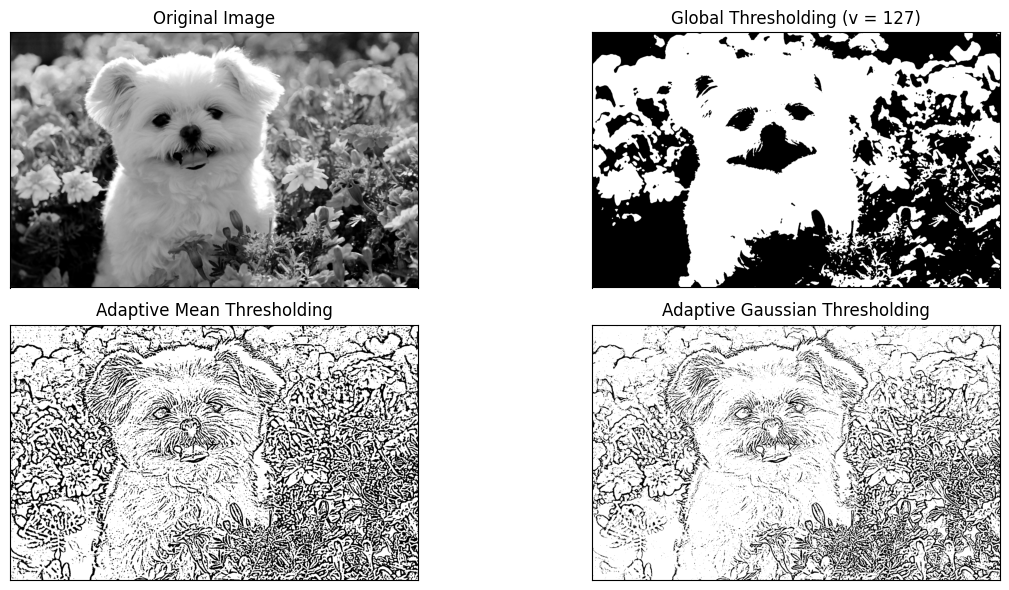

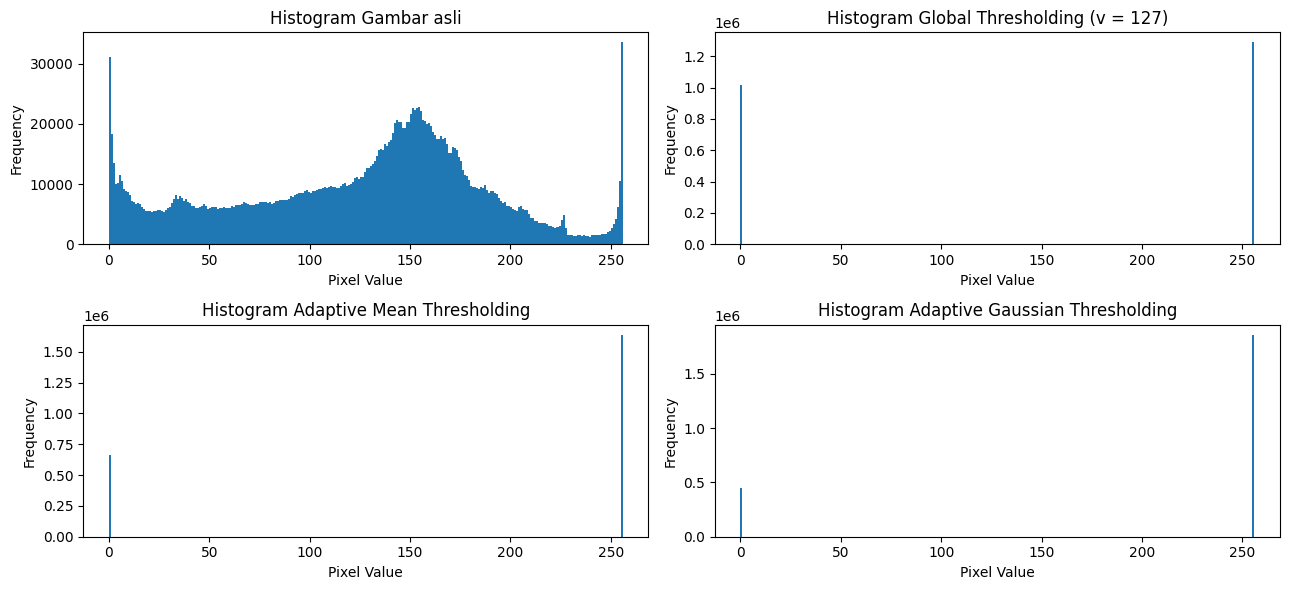

In [25]:
# mengimport library yg diperlukan
import cv2
import numpy as np
from matplotlib import pyplot as plt

# membaca gambar
img = cv2.imread('Image/puppy.jpg', 0)

# digunakan median blur untuk menghaluskan tepi objek pada citra
img = cv2.medianBlur(img, 5)

# Melakukan thresholding binary menggunakan fungsi threshold dari OpenCV dengan nilai threshold 127.
ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Melakukan thresholding adaptif
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Plotting
titles = ['Original Image', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

# menampilkan hasil
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
# Melakukan iterasi untuk menampilkan gambar-gambar secara berurutan. Mengatur tata letak subplot dengan 2 baris dan 2 kolom. Menampilkan gambar pada subplot yang sesuai, memberikan judul menggunakan 'titles', dan menghilangkan label sumbu x dan y.

# Mengatur tata letak subplot
plt.tight_layout()
plt.show()

# Membuat histogram dari gambar asli
plt.subplot(2, 2, 1)
plt.hist(img.ravel(), 256, [0, 256])
plt.title('Histogram Gambar asli')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Membuat histogram dari gambar setelah di filter
for i in range(1, 4):
    plt.subplot(2, 2, i + 1)
    plt.hist(images[i].ravel(), 256, [0, 256])
    plt.title('Histogram ' + titles[i])
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
